*Deep Learning Course Practicals*
# P1 - Review of relevant concepts

In this practical we will use Python, [**Numpy**](https://numpy.org/) and [Scipy](https://scipy.org/) to solve exercises about:
 - Linear algebra
 - Probability distributions and sampling
 - Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Algebra

### Review

#### 1.1 Basic operations
Vectors and matrices can be represented in python as numpy arrays. Consider the following:

$$
M = \begin{pmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 9
\end{pmatrix}, b = \begin{pmatrix}
  -1  \\
  0 \\
  1
\end{pmatrix}
$$

In [2]:
M = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
b = np.array([[-1],
              [0],
              [1]])

In [3]:
# Checking their shapes
print(M.shape)
print(b.shape)

(3, 3)
(3, 1)


Accessing elements of the array:

In [4]:
# second element of the third row - !! remember that index starts at 0
print(M[2,1])
# get the entire second column
print(M[:,1])

8
[2 5 8]


We can multiply arrays by scalars, sum them, etc.

**Attention:** numpy allows us to perform some operations in a different way from analytical linear algebra, *e.g.,*
$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 1 & 1 \\
  1 & 1 & 1
\end{pmatrix} + 2
$$ is not a valid operation as matrices can only be summed if they have the same shape.

In numpy:

In [5]:
np.array([[1,1,1],
          [1,1,1],
          [1,1,1]]) + 2

array([[3, 3, 3],
       [3, 3, 3],
       [3, 3, 3]])

The value is *broadcast* to the entire matrix. We must be careful with these operations to make sure they're doing exactly what we want.

Another example:

In [6]:
# summing a row
np.array([[1,1,1],
          [1,1,1],
          [1,1,1]]) + np.array([1,2,3])

array([[2, 3, 4],
       [2, 3, 4],
       [2, 3, 4]])

In [7]:
# suming a single column matrix
np.array([[1,1,1],
          [1,1,1],
          [1,1,1]]) + np.array([[1],[2],[3]])

array([[2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [8]:
# Multiplying by scalar
2 * M

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [9]:
# Summing matrices
B = np.array([[1,1,1],
          [1,1,1],
          [1,1,1]])
M + B

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

Transpose of a matrix: $A^T$

Remember that a matrix is **symmetric** if:  $A = A^T$

In [10]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [11]:
C = np.array([[1,2,3],
          [2,4,5],
          [3,5,7]])

Is $C$ symmetric?

In [12]:
C.T == C

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

To muliply matrices use `np.dot()`. If you do `A*B`it will mupliply the arrays element wise (Hadamard product).

In [13]:
C.dot(C.T)

array([[14, 25, 34],
       [25, 45, 61],
       [34, 61, 83]])

In [14]:
print(M)
print(B)
print(f'Elementwise (Hadamard) multiplication:\n {M*B}')
print(f'Matrix multiplication:\n {M.dot(B)}')

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Elementwise (Hadamard) multiplication:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix multiplication:
 [[ 6  6  6]
 [15 15 15]
 [24 24 24]]


Inverse of a matrix: $A^{-1}$

In [15]:
np.linalg.inv(C)

array([[-3., -1.,  2.],
       [-1.,  2., -1.],
       [ 2., -1.,  0.]])

We know that $AA^{-1} = I$. Let's check:

In [16]:
np.linalg.inv(C).dot(C)

array([[ 1.00000000e+00,  1.99840144e-15,  2.44249065e-15],
       [ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

Due to rounding in operations the matrix is not **exactly** the identity:

In [17]:
# The identity matrix
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
np.isclose(np.linalg.inv(C).dot(C) , I)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Remember that matrices are only invertible if the **determinant** is not equal to 0.

Check the result of uncommenting the operation below:

In [19]:
print(f'Determinant of M: {np.linalg.det(M)}')
# np.linalg.inv(M)

Determinant of M: 0.0


#### 1.2 Solving linear systems

Let's solve:
$$Cx=b,$$ with:

$$
C = \begin{pmatrix}
  1 & 2 & 3 \\
  2 & 4 & 5 \\
  3 & 5 & 7
\end{pmatrix}, b = \begin{pmatrix}
  -1  \\
  0 \\
  1
\end{pmatrix}
$$

In [20]:
np.linalg.solve(C,b)

array([[ 5.00000000e+00],
       [ 1.83186799e-15],
       [-2.00000000e+00]])

which is  $x = C^{-1}b$

In [21]:
np.linalg.inv(C).dot(b)

array([[ 5.00000000e+00],
       [ 1.77635684e-15],
       [-2.00000000e+00]])

#### 1.3 Vector Norms

Calculating the $l_p$ norm of a vector:
$$||x||_p = \big(\sum |x_i|^p\big)^{\frac{1}{p}} $$
is easy in numpy:

In [22]:
v = np.array([1,5,-7])
print(f'L2/ Euclidean norm: {np.linalg.norm(v,2)}')
print(f'L1/Manhattan norm: {np.linalg.norm(v,1)}')
print(f'L-infinity norm: {np.linalg.norm(v,np.inf)}')

L2/ Euclidean norm: 8.660254037844387
L1/Manhattan norm: 13.0
L-infinity norm: 7.0


#### 1.4 Eigenvalues and eigenvectors

The **eigenvectors** of a matrix A are vectors that when **multiplied by A** result in a **vector of the same direction** - scaled by a scalar (the corresponding **eigenvalue**):

$$Av = \lambda v$$

In [23]:
# finding eigenvectors and values of matrix C
print(np.linalg.eig(C))
eigenvalues, eigenvectors = np.linalg.eig(C)

EigResult(eigenvalues=array([11.90897874, -0.24781764,  0.3388389 ]), eigenvectors=array([[ 0.31351175,  0.90082516,  0.30037379],
       [ 0.56280048,  0.07850569, -0.82285629],
       [ 0.7648307 , -0.42702563,  0.48237237]]))


**Eigendecomposition of a matrix** is an important factorization method:
$$
A = V \Lambda V^{-1}
$$

where

- $A \in \mathbb{R}^{n \times n}$ is a square matrix,
- $V = [v_1 \; v_2 \; \cdots \; v_n]$ is the matrix of eigenvectors, and
- $\Lambda = \mathrm{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$ is the diagonal matrix of eigenvalues.

Let's factorize matrix $C$:

In [24]:
V = eigenvectors
Lambda = np.diag(eigenvalues)
# Check:
print(C)
print(V.dot(Lambda).dot(np.linalg.inv(V)))

[[1 2 3]
 [2 4 5]
 [3 5 7]]
[[1. 2. 3.]
 [2. 4. 5.]
 [3. 5. 7.]]


It makes computing powers of matrices easier:
$$A^n = V \Lambda^n V^{-1}$$

In [25]:
print(np.linalg.matrix_power(C,10))
print(V.dot(np.linalg.matrix_power(Lambda,10)).dot(np.linalg.inv(V)))

[[ 5639659130 10124031436 13758286225]
 [10124031436 18174150273 24698181049]
 [13758286225 24698181049 33564163274]]
[[5.63965913e+09 1.01240314e+10 1.37582862e+10]
 [1.01240314e+10 1.81741503e+10 2.46981810e+10]
 [1.37582862e+10 2.46981810e+10 3.35641633e+10]]


### Exercises
Using `numpy`:

1.  check if matrix $M$ is invertible
$$M = \begin{pmatrix}
  3 & 2 & 1 \\
  4 & -1 & 1 \\
  -2 & 3 & 2
\end{pmatrix}$$  
1.1 select the second element of the third row.  
1.2 select the third column

2. Solve the system $Mx=v$ with:
$$v = \begin{pmatrix}
  -1  \\
  0 \\
  1 \end{pmatrix}$$
3. Check if matrix $M$ is positive semi-definite (PSD). (*Hint:* check eigenvalues.)

4. Check that the trace of the matrix equals the sum of its eigenvalues.

5. Consider matrix $N$,
$$N = \begin{pmatrix}
  1 & 2  \\
  2 & 1
\end{pmatrix}$$
5.1 Verify that $N$ is symmetric.  
5.2 Verify that $v_1 = [1 \quad -1]^T$ is an eigenvector of $N$ and find its eigenvalue.  
5.3 Find the eigendecomposition of matrix $N$.  
5.4 Check that the eigenvectors of $N$ are orthogonal. (Because $N$ is symmetric!!).

6. Using vectors $v = \begin{pmatrix}
  -1  \\
  0 \\
  1 \end{pmatrix}$ and $u = \begin{pmatrix}
  2  \\
  3 \\
  -1 \end{pmatrix}$, check that the triangle inequality holds for a norm of your choice. ($||x+y||\leq ||x|| + ||y||$)

## 2. Probability Theory

### Review

#### 2.0 Random variables and Scipy

Scipy has a long list of pre-defined random variables [available](https://docs.scipy.org/doc/scipy/reference/stats.html#random-variables).
You instantiate the r.v.:

```
from scipy.stats import [chosen_rv]
rv = chosen_rv(parameter_1,...)
```
and these come equipped with several built-in methods.
Check methods for [continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous) and [discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete) r.v.

Examples:
```
rv.mean() # theoretical mean
rv.var() #theoretical variance
```

You can also compute the cumulative distribution function (CDF):
$$F_X(x) = P(X\leq x)
$$
with:
```
rv.cdf(x)
```
Or the probability mass function (PMF) for discrete variables, or the probability density function (PDF) for continuous variables:
$$f_X(x) = P(X = x)$$

```
rv.pmf(k) # discrete
rv.pdf(x) # continuous
```

#### 2.1 Discrete random variables

##### **Uniform** - equally likely outcomes, *e.g.*, rolling a balanced die
 $$x\in\{x_1,\ldots,x_K\}, \quad f(x)=\frac{1}{K}$$


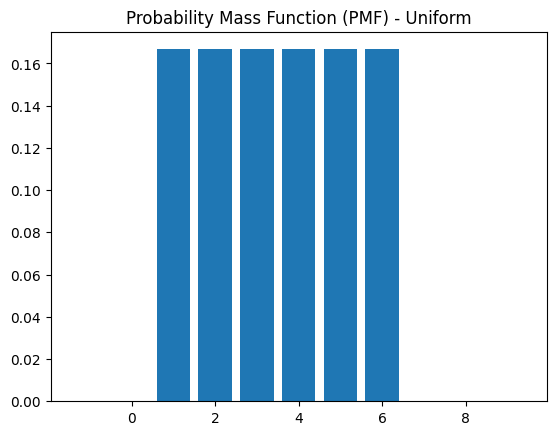

In [26]:
from scipy.stats import randint, bernoulli, binom
# rolling a die
unif_rv = randint(1,7) # excludes the upper limit
x = np.arange(-1,10)
plt.bar(x,unif_rv.pmf(x))
plt.title('Probability Mass Function (PMF) - Uniform')
plt.show()

In [27]:
# Sampling - simulating die rolls
N_trials = 10
unif_rv.rvs(N_trials)

array([4, 2, 3, 3, 3, 2, 3, 6, 3, 2])

##### **Bernoulli** - success of a process with two possible outcomes, *e.g.*, scoring a goal or getting heads in a coin toss
 $$x\in\{0,1\}, \quad f(x)= p^x(1-p)^{1-x}$$


In [28]:
# tossing a coin
p = 0.5
bern_rv = bernoulli(p)
print(f'Theoretical mean: {bern_rv.mean()} = p')
print(f'Theoretical var: {bern_rv.var()} = p(1-p)')

Theoretical mean: 0.5 = p
Theoretical var: 0.25 = p(1-p)


In [29]:
# empirical expected values and variances
N_trials = 10000
trials = bern_rv.rvs(N_trials)
print(f'Sample mean: {trials.mean()}')
print(f'Sample var: {trials.var()}')

Sample mean: 0.505
Sample var: 0.24997499999999995


Increase `N_trials` to see the empirical value getting closer to the true value - Law of Large Numbers!

##### **Binomial** - number of successes in $n$ trials: sum of Bernoullis, *e.g.*, number of goals scored in 10 attempts or number of heads in 100 coin tosses:
 $$x\in\{0,\ldots n\}, \quad f(x)= \binom{n}{x} \, p^x \, (1 - p)^{n - x}
 $$

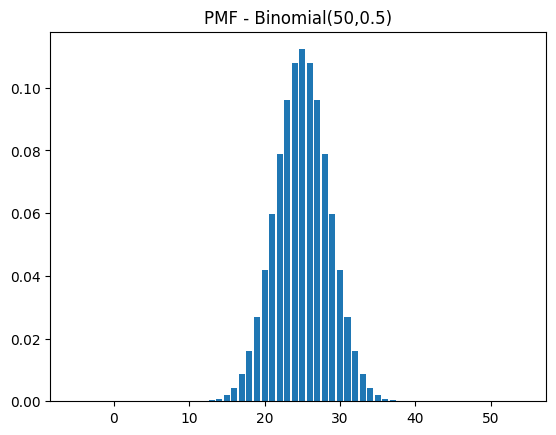

In [30]:
# number of heads in 50 coin tosses
n,p = 50, 0.5
bin_rv = binom(n,p)
x = np.arange(-5,55)
plt.title('PMF - Binomial(50,0.5)')
plt.bar(x,bin_rv.pmf(x))
plt.show()

That looks very *"normal"* !

Actually, if $n$ is large enough, the binomial distribution ($X \sim \mathrm{Bin}(n, p)$) can be **approximated** by a normal distribution:
$$\mathscr{N}(np,\; np(1-p))$$:

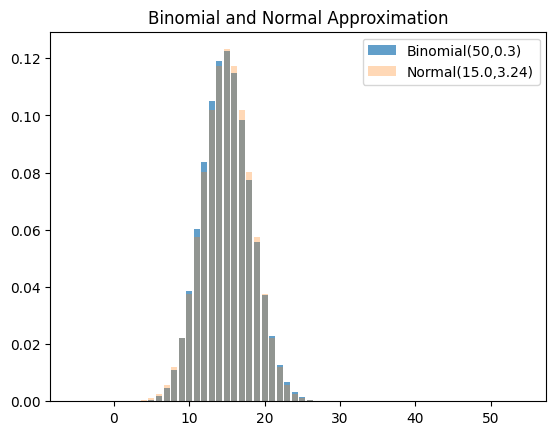

In [31]:
from scipy.stats import norm
n,p = 50, 0.3
bin_rv_2 = binom(n,p)
x = np.arange(-5,n+5)
plt.title('Binomial and Normal Approximation')
plt.bar(x,bin_rv_2.pmf(x),alpha=0.7,label = f'Binomial({n},{p})')
plt.bar(x, norm(n*p,np.sqrt(n*p*(1-p))).pdf(x),alpha=0.3,label = f'Normal({n*p},{np.sqrt(n*p*(1-p)):.2f})' )
plt.legend()
plt.show()
# Increase n to see approximation improve

#### 2.2 Continuous distributions

##### **Uniform** - uniform distribution in $[a,b]$:
$$f(x) =
\begin{cases}
\frac{1}{b - a}, & a \le x \le b, \\
0, & \text{otherwise}.
\end{cases}$$

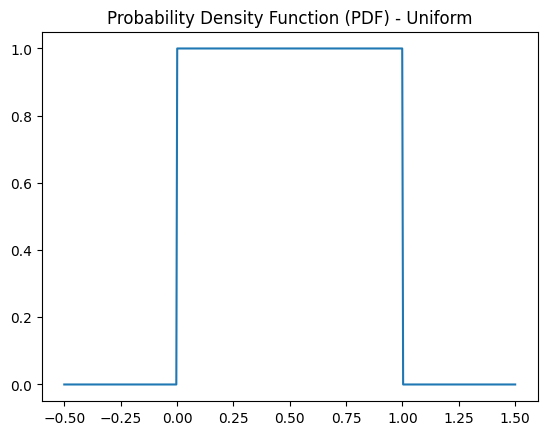

In [32]:
from scipy.stats import uniform
unif_cont_rv = uniform(0,1)
plt.title('Probability Density Function (PDF) - Uniform')
x = np.linspace(-0.5,1.5,500)
plt.plot(x,unif_cont_rv.pdf(x))
plt.show()

In [33]:
# Sampling from the distribution
unif_cont_rv.rvs(10)

array([0.14046585, 0.74532379, 0.69251632, 0.38569233, 0.71799697,
       0.09916579, 0.08103795, 0.2671762 , 0.07225588, 0.78043295])

##### **Gaussian (Normal)** - $\mathscr{N}(\mu,\sigma^2)$

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}
\exp\!\left( -\,\frac{(x - \mu)^2}{2\sigma^2} \right)$$

**Attention:** in `scipy.stats` the parameters for the normal distribution are: $\mu$ (mean) and $\sigma$ (standard deviation) - **not** $\sigma^2$ (variance).

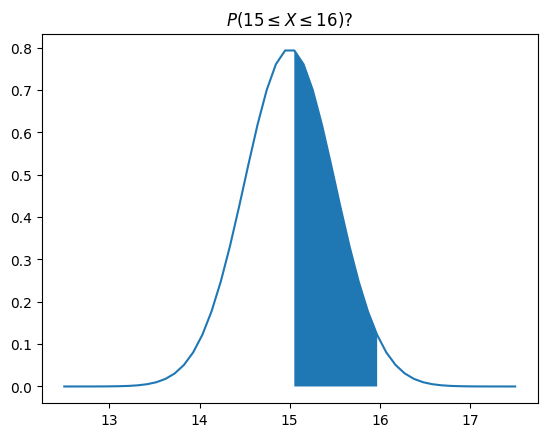

In [34]:
from scipy.stats import norm
mu = 15
sigma = 0.5
normal_rv = norm(mu, sigma)
x = np.linspace(mu-5*sigma, mu+5*sigma)
plt.title(r'$P(15\leq X\leq16)$?')
plt.plot(x, normal_rv.pdf(x))
plt.fill_between(x,normal_rv.pdf(x),where = (x>=15) & (x<=16))
plt.show()

We can use the **Cumulative Distribution Function CDF**:

$$P(15\leq X\leq16) = P(X\leq16) - P(X\leq15) = F(16) - F(15)$$  

In [35]:
print(f'Probability of X between 15 and 16 is {normal_rv.cdf(16)-normal_rv.cdf(15)}')

Probability of X between 15 and 16 is 0.4772498680518208


#### 2.3 Covariance and Correlation

The covariance between two random variables is given by:

$$\operatorname{cov}(X, Y)
= \mathbb{E}\!\left[(X - \mathbb{E}(X))(Y - \mathbb{E}(Y))\right]
= \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y).$$

Remember:

$$\operatorname{cov}(X, X) = \operatorname{Var}(X)$$

Let's see an example:

In [36]:
mu_1, mu_2 = 2 , 5
sigma_1, sigma_2 = 0.1, 0.2
normal_1 = norm(mu_1,sigma_1)
normal_2 = norm(mu_2,sigma_2)
sample_1, sample_2 = normal_1.rvs(10000),normal_2.rvs(10000)
print('Covariance matrix:')
print(np.cov(sample_1,sample_2))

Covariance matrix:
[[0.00996756 0.00036797]
 [0.00036797 0.0398804 ]]


We can define a **multivariate Gaussian distribution** by providing a vector of means $\mathbf{\mu}$ and covariance matrix $\Sigma$:
$$\Sigma = V(X) = \mathbb{E}\!\left[(X - \mu)(X - \mu)' \right]=$$

\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2n} \\
\vdots      & \vdots      & \ddots & \vdots     \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
\end{bmatrix}.

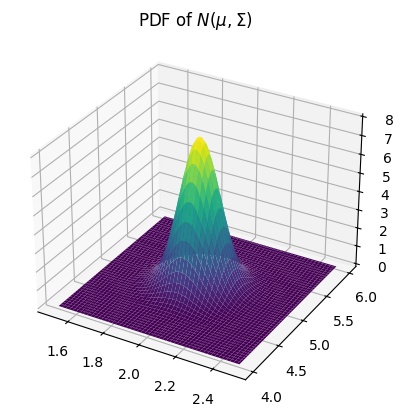

In [37]:
from scipy.stats import multivariate_normal
mus = [mu_1,mu_2]
Sigma = np.cov(sample_1,sample_2, ddof=1)
multi_normal_rv = multivariate_normal(mus, Sigma)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title(r'PDF of $N(\mu,\Sigma)$')
x = np.linspace(mu_1-5*sigma_1,mu_1+5*sigma_1, 100)
y = np.linspace(mu_2-5*sigma_2,mu_2+5*sigma_2, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
Z = multi_normal_rv.pdf(pos)
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none')
plt.show()

**Correlation** is a standardized version of covariance (where the value is impacted by each r.v. scale of values), with values between $[-1,1]$:

$$\rho_{X,Y}
= \frac{\operatorname{cov}(X, Y)}
{\sqrt{\operatorname{var}(X)} \, \sqrt{\operatorname{var}(Y)}}
= \frac{\operatorname{cov}(X, Y)}{\sigma_X \sigma_Y}.$$


In [38]:
print('Correlation:')
print(np.corrcoef(sample_1,sample_2))
print('Covariance:')
print(Sigma)
print('Equivalence (empirical):')
print(Sigma/np.array([[sigma_1**2,sigma_1*sigma_2],
                      [sigma_2*sigma_1, sigma_2**2]]))

Correlation:
[[1.         0.01845587]
 [0.01845587 1.        ]]
Covariance:
[[0.00996756 0.00036797]
 [0.00036797 0.0398804 ]]
Equivalence (empirical):
[[0.99675588 0.01839834]
 [0.01839834 0.9970099 ]]


#### 2.4 Entropy and KL Divergence

Remmeber that the entropy of a discre r.v., $X\in\{1,\ldots K\}$, is given by:

$$H(X) = - \sum_{i=1}^K p(x_i) \log p(x_i)$$

Let's compare the empirical entropy of two samples:

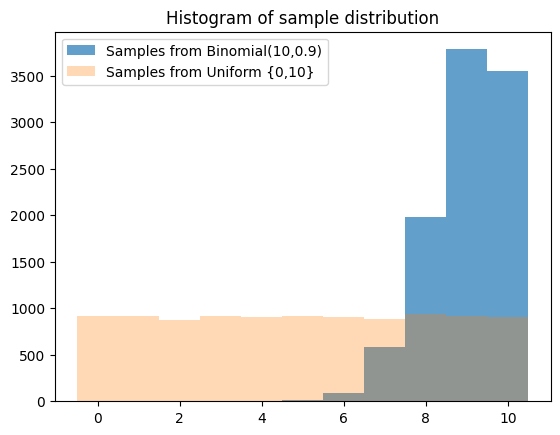

In [39]:
n = 10
p = 0.9
x = np.arange(0,n+1)
N = 10000
# sampling
binomial_sample = binom(n,p).rvs(N)
uniform_sample = randint(0,n+1).rvs(N)

# checking distribution
plt.title('Histogram of sample distribution')
plt.hist(binomial_sample, alpha = 0.7, label = f'Samples from Binomial({n},{p})',bins=np.arange(-0.5, 11, 1))
plt.hist(uniform_sample, alpha = 0.3, label = 'Samples from Uniform {0,'+ f'{n}' + '}',bins=np.arange(-0.5, 11, 1))
plt.legend()
plt.show()

Which one seems to yield most surprise?

In [40]:
from scipy.stats import entropy

# get relative frequency of observations
binomial_rel_freqs = np.unique(binomial_sample, return_counts=True)[1]/N
uniform_rel_freqs = np.unique(uniform_sample, return_counts=True)[1]/N

# compute entropy from probability estimates
print(f'Binomial sample entropy: {entropy(binomial_rel_freqs)}')
print(f'Uniform sample entropy: {entropy(uniform_rel_freqs)}')

# theoretical values
def get_entropy(probs):
    return -(probs*np.log(probs)).sum()

# theoretical values from actual distribution
print(f'Binomial Theoretical entropy: {get_entropy(binom(n,p).pmf(x))}')
print(f'Uniform Theoretical entropy: {get_entropy(randint(0,n+1).pmf(x))}')

Binomial sample entropy: 1.27686169379977
Uniform sample entropy: 2.397732117345651
Binomial Theoretical entropy: 1.2779073568820203
Uniform Theoretical entropy: 2.3978952727983707


Let's compute  the Kullback Leibler (KL) Divergence between the theoretical distributions:
$$D_{\mathrm{KL}}(P \,\|\, Q)
= \sum_{x \in \{1,\ldots, K\}} P(x) \log \frac{P(x)}{Q(x)}$$

In [ ]:
# get KL divergence with entropy function:
print(f'KL divergence between Binomial({n},{p}) and Uniform with the same support')
print(entropy(binom(n,p).pmf(x),randint(0,n+1).pmf(x)))

KL divergence between Binomial(10,0.9) and Uniform with the same support
1.1199879159163504


What do you think happens if we change $p$ to a less extreme value, like $0.5$?

In [ ]:
print(f'KL divergence between Binomial({n},0.5) and Uniform with the same support')
print(entropy(binom(n,0.5).pmf(x),randint(0,n+1).pmf(x)))

KL divergence between Binomial(10,0.5) and Uniform with the same support
0.5219416675515702


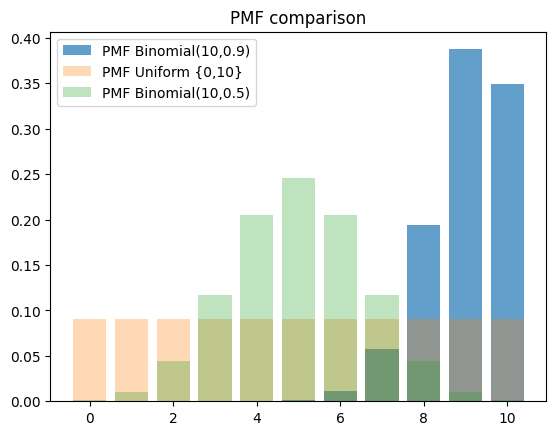

In [43]:
plt.title('PMF comparison')
plt.bar(x, binom(n,p).pmf(x), alpha = 0.7, label = f'PMF Binomial({n},{p})')
plt.bar(x, randint(0,n+1).pmf(x), alpha = 0.3, label = 'PMF Uniform {0,'+ f'{n}' + '}')
plt.bar(x, binom(n,0.5).pmf(x), alpha = 0.3, label = f'PMF Binomial({n},{0.5})')
plt.legend()
plt.show()

### Exercises
1. Consider $X\sim Binomial(20,0.2)$.  
1.1 Sample $N = 5000$ points from the distribution.  
1.2 Compute the sample's mean and variance.  
1.3 Compare the values with the theoretical expected value and variance.  

2. Consider $Y_1\sim N(2,0.1)$ and $Y_2\sim N(-3,0.2)$.  
2.1 Plot the probability density functions.  
2.2 Find $cov(Y_1,Y_2)$ using a sample of size $10000$.  
2.3 Find the covariance matrix $\Sigma$.  
2.4 Define the approximate joint distribution $(Y_1,Y_2)$

3. Consider $X_1\sim Binomial(5,0.5)$ and $X_2\sim Binomial(5,0.1)$.  
3.1 Compute the entropy of each distribution.  
3.2 Generate $5000$ samples from each distribution and compute the empirical entropy.  
3.3 Compute the KL divergence between the two distributions.   
3.4 Provide an example of a distribution with the same support but with a greater entropy than $X_1$ and $X_2$.  
3.5 Provide an example of a distribution with a greater KL divergence from $X_1$ than $X_2$.

## 3. Optimization

### Review

#### 3.1 Gradient Descent
Let's use the **gradient descent** algorithm to find the minimum of a funcion. Remember, for differentiable $f$, gradient descent iterates by going in the opposite direction of the function's gradient:

$$x^{(t+1)} \leftarrow x^{(t)} - \eta \nabla f\!\left(x^{(t)}\right),
$$
where $\eta$ is the **step size**.

In [44]:
def gradient_descent(gradient, x_0, learn_rate,
                     n_iter=50, tolerance=1e-06):
    x_list = [x_0]
    x = x_0
    for _ in range(n_iter):
        diff = -learn_rate * gradient(x)
        if np.all(np.abs(diff) <= tolerance):
            break
        x += diff
        x_list.append(x)
    return np.array(x_list)

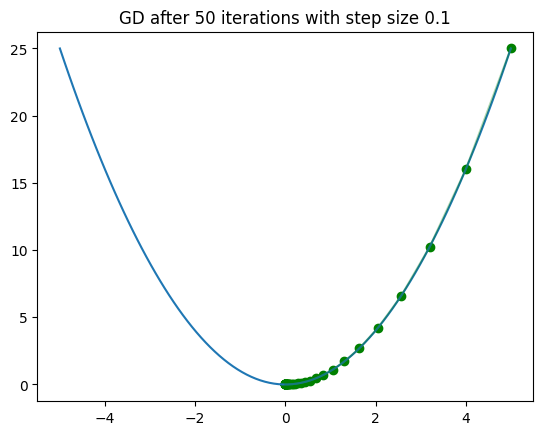

In [45]:
f = lambda x: x**2
# define gradient
grad_f = lambda x: 2*x


# iterating with gradient descent
step_size = 0.1
iterations = gradient_descent(grad_f, 5, step_size)

# observing iterations
points = np.linspace(-5,5,100)

plt.title(f'GD after {iterations.shape[0]-1} iterations with step size {step_size}')
plt.plot(points,f(points))
plt.scatter(iterations,f(iterations), c='green')
plt.plot(iterations,f(iterations),alpha=0.3, c='green')
plt.show()

Change the step size to see what happens!

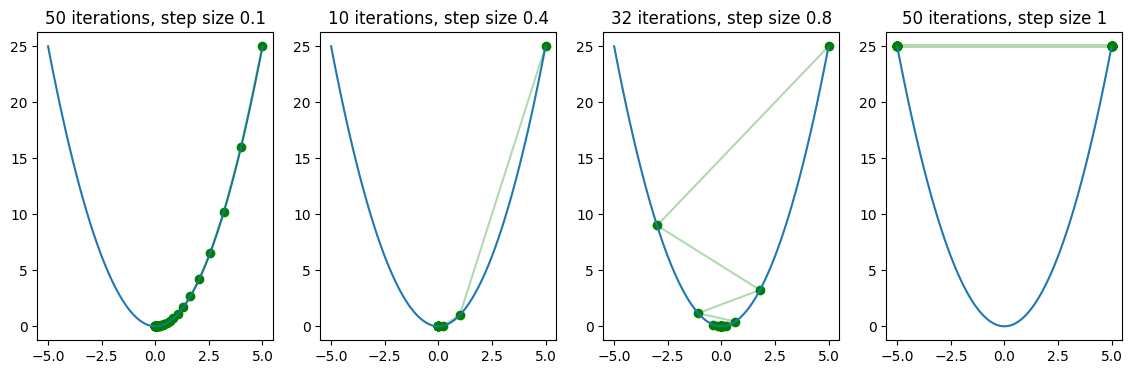

In [46]:
fig, axs = plt.subplots(1,4, figsize = (14,4))
step_sizes = [0.1,0.4,0.8,1]

for i,size in enumerate(step_sizes):
    iterations = gradient_descent(grad_f, 5, size)

    # observing iterations
    points = np.linspace(-5,5,100)
    ax = axs[i]
    ax.set_title(f'{iterations.shape[0]-1} iterations, step size {size}')
    ax.plot(points,f(points))
    ax.scatter(iterations,f(iterations), c='green')
    ax.plot(iterations,f(iterations),alpha=0.3, c='green')
plt.show()

#### 3.2 Local minimum vs global minimum

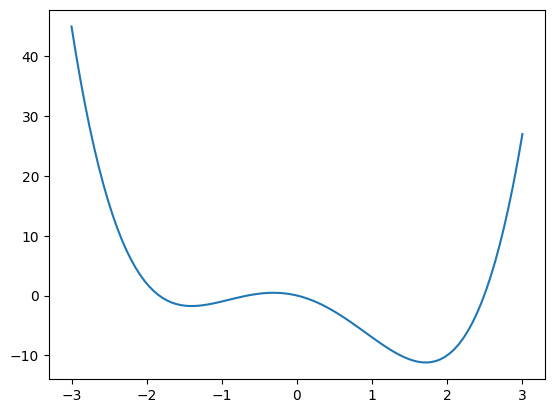

In [47]:
g = lambda x: x**4 - 5*x**2 - 3*x

# define gradient
grad_g = lambda x: 4 * x**3 - 10 * x - 3

points = np.linspace(-3,3,100)
plt.plot(points, g(points), label = 'g')
plt.show()

Let's try different starting points and step sizes:

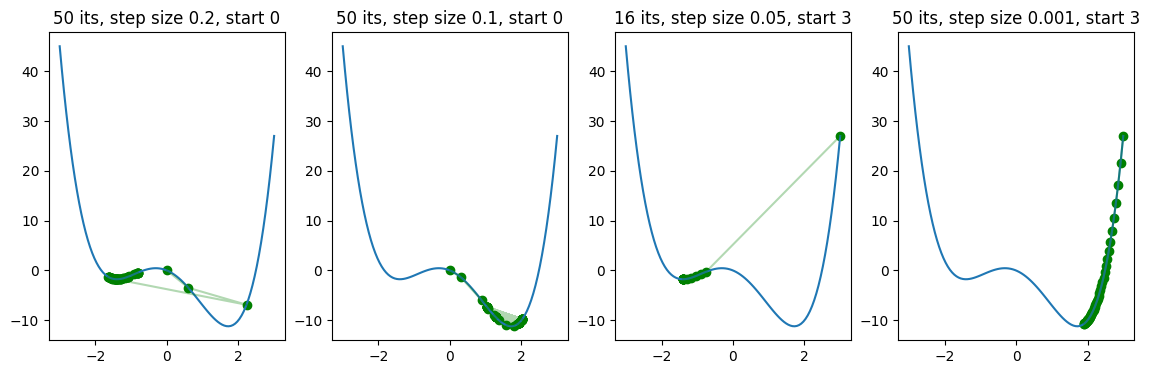

In [48]:
fig, axs = plt.subplots(1,4, figsize = (14,4))
start_and_sizes = [(0,0.2),(0,0.1),(3,0.05),(3,0.001)]
for i,pair in enumerate(start_and_sizes):
    start, size = pair
    iterations = gradient_descent(grad_g, start, size)

    # observing iterations
    points = np.linspace(-3,3,100)
    ax = axs[i]
    ax.set_title(f'{iterations.shape[0]-1} its, step size {size}, start {start}')
    ax.plot(points,g(points))
    ax.scatter(iterations,g(iterations), c='green')
    ax.plot(iterations,g(iterations),alpha=0.3, c='green')
plt.show()

Both initialization and step size will have an impact on convergence!

### Exercises

Explore different step sizes, functions and explore different optimization methods!